# Anemia - Logistic Regression

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Anemia data

anemia_df = ml.get_data_of_disease(driver, 'Anemia')
anemia_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Anemia
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
8878,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8879,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8880,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [20]:
log_reg = ml.LogisticRegression()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

log_reg.fit(X_train, y_train)

# Accuracy scores

y_pred = log_reg.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, log_reg.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9631245601688951
Testing Accuracy:  0.9636824324324325


## Feature Selection

### Correlation Analysis

In [21]:
log_reg_test = ml.LogisticRegression()

In [22]:
pos_corr, neg_corr = ml.get_correlated_features(anemia_df,'Anemia',pos=0.04,neg=-0.04)

corr_features = list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features

['Red cell distribution width [%]',
 'Transferrin receptor [nmol/L]',
 'Platelet_Lymphocyte Ratio',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Trans-lycopene [umol/L]',
 'Blood selenium [umol/L]',
 'LDL_HDL Ratio',
 'Total Lycopene [umol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Bicarbonate [mmol/L]',
 'Lymphocyte [%]',
 'Mean cell volume [fL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Alanine Aminotransferase [U/L]']

In [23]:
ml.evaluate_feature_set(corr_features, log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.961

Test Accuracy: 0.962

Precision: 0.625

Recall: 0.037

F1-Score: 0.069


### SelectFromModel

In [24]:
sfm_features = ml.select_from_model_features(log_reg_test,X,y)
sfm_features

['Gender',
 'Age',
 'A/G Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Blood mercury [nmol/L]',
 'Globulin [g/dL]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Hydroxycotinine [ng/mL]',
 'Iron frozen [umol/L]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Albumin [g/dL]',
 'Hemoglobin [g/dL]',
 'Transferrin Saturation [%]',
 'Transferrin receptor [nmol/L]']

In [25]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.962

Precision: 0.533

Recall: 0.059

F1-Score: 0.106


### SelectKBest

In [26]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin receptor [nmol/L]',
 'RBC count [million cells/uL]',
 'Albumin [g/dL]',
 'Gender',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Mean cell hemoglobin [pg]',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Age',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Total Calcium [mg/dL]',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Bilirubin [mg/dL]',
 'Globulin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Mean cell volume [fL]',
 'Segmented neutrophils [%]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Lymphocyte [%]']

In [27]:
ml.evaluate_feature_set(k_best_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.643

Recall: 0.066

F1-Score: 0.120


### Recursive Feature Elimination (RFE) 

In [28]:
rfe_features = ml.select_rfe_features(log_reg_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Platelet count [1000 cells/uL]',
 'Iron frozen [umol/L]',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Hematocrit [%]',
 'Glycohemoglobin [%]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Non_HDL Ratio',
 'Total Cholestrol_HDL Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Albumin [g/dL]',
 'Age',
 'Blood mercury [nmol/L]',
 'Transferrin Saturation [%]',
 'Trans-lycopene [umol/L]',
 'Hemoglobin [g/dL]',
 'A/G Ratio',
 'Creatine Phosphokinase [IU/L]',
 'White blood cell count [1000 cells/uL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Alanine Aminotransferase [U/L]',
 'Total Lycopene [umol/L]',
 'Alpha-crypotoxanthin [umol/L]']

In [29]:
ml.evaluate_feature_set(rfe_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.625

Recall: 0.074

F1-Score: 0.132


### Lasso Regularization

In [31]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Gender',
 'Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Age',
 'Alpha-crypotoxanthin [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Blood mercury [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Retinol [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Hydroxycotinine [ng/mL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'RBC count [million cells/uL]',
 'Total Calcium [mg/dL]',
 'Alanine Aminotransferase [U/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Glycohemoglobin [%]',
 'Total Cholestrol_HDL Ratio',
 'Uric Acid [mg/dL]',
 'Trans-lycopene [umol/L]',
 'Sodium [mmol/L]',
 'Transferrin Saturation [%]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Blood cadmium [nmol/L]',
 'Iron frozen [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Blood Urea Nitrogen [mg/dL]']

In [32]:
ml.evaluate_feature_set(l1_selected_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.643

Recall: 0.066

F1-Score: 0.120


### Relief F

In [33]:
relieff_features = ml.relief_feature_select(30,X,y)

In [34]:
relieff_features[:30]

['Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Segmented neutrophils [%]',
 'Lymphocyte [%]',
 'BMI',
 'Neutrophil_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Red cell distribution width [%]',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Gender',
 'Albumin [g/dL]',
 'Uric Acid [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Osmolality [mmol/Kg]',
 'Iron frozen [umol/L]',
 'Retinol [umol/L]',
 'Total Calcium [mg/dL]',
 'Chloride [mmol/L]',
 'Non_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'UIBC [umol/L]',
 'Globulin [g/dL]',
 'Blood selenium [umol/L]',
 'Bicarbonate [mmol/L]']

In [35]:
ml.evaluate_feature_set(relieff_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.961

Test Accuracy: 0.962

Precision: 0.500

Recall: 0.066

F1-Score: 0.117


### Optimal no. of features

In [36]:
final_features = list(rfe_features) 


Maximum accuracy = 0.9623 for 21 features


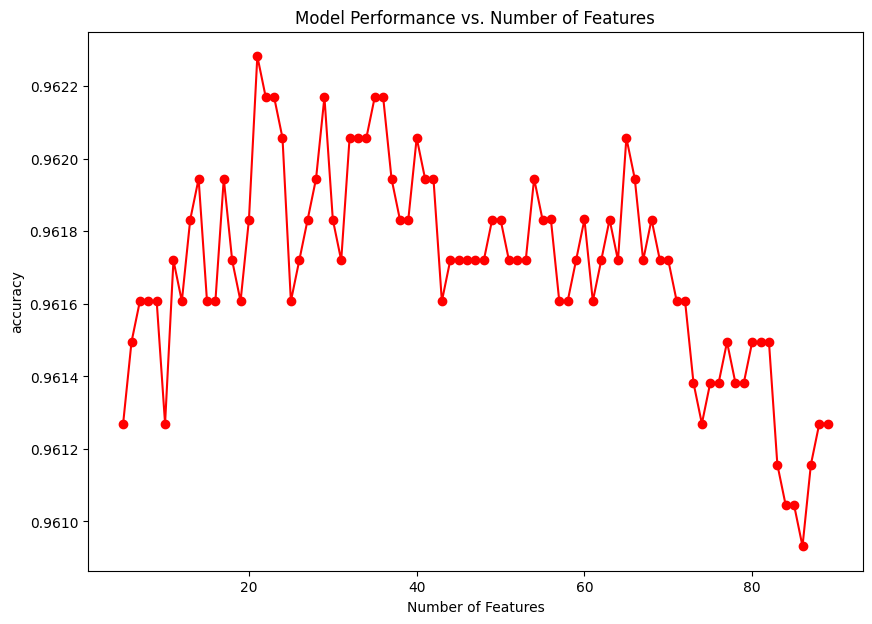

In [37]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.1184 for 42 features


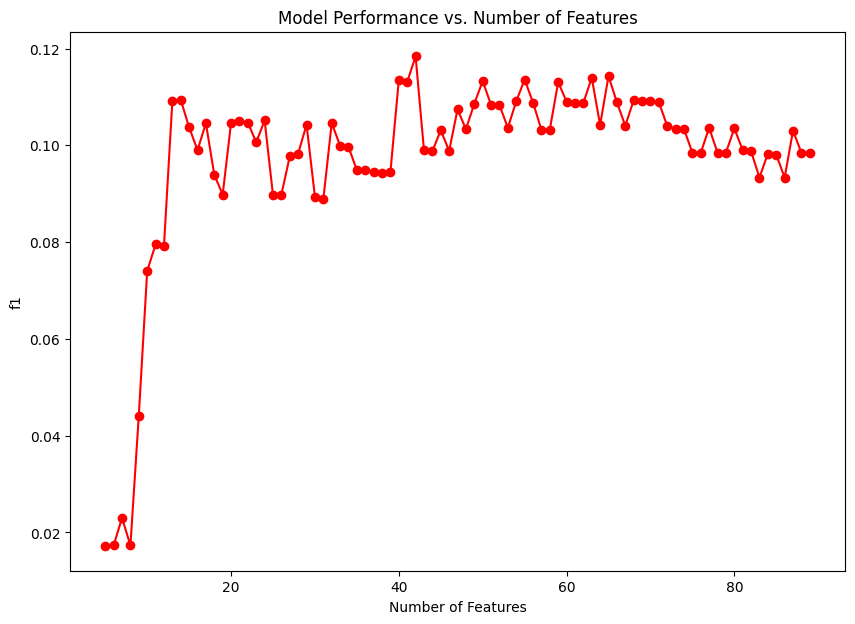

In [38]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='f1')


Maximum recall = 0.0676 for 42 features


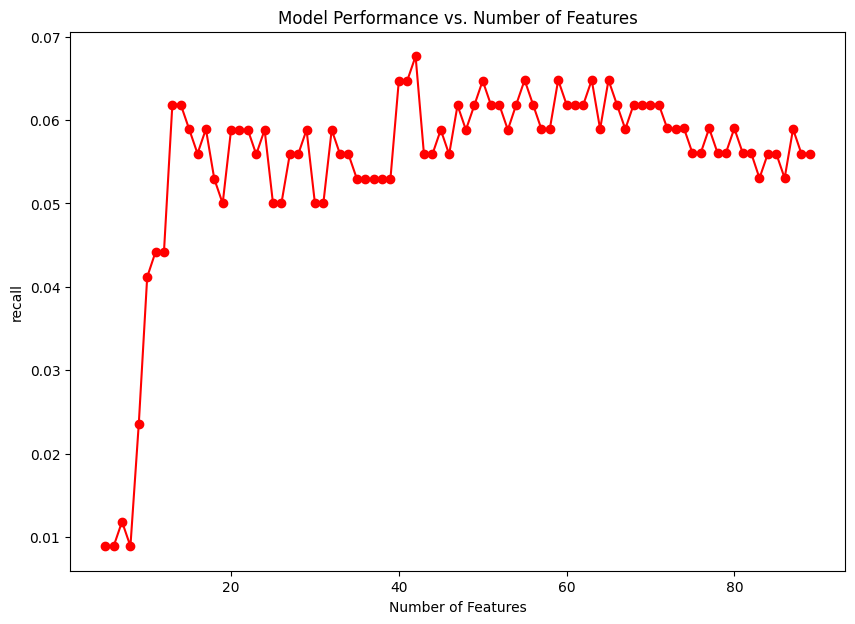

In [39]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='recall')

In [40]:
num_features = 42

selected = final_features[:num_features]
selected.append('Anemia')

anemia_df = anemia_df[selected]

In [42]:
# Save feature set

feature_dir = "../Models/Anemia/Feature Sets"
if not ml.os.path.exists(feature_dir):
    ml.os.makedirs(feature_dir)

with open('../Models/Anemia/Feature Sets/Logistic Regression Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [43]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [44]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.625

Recall: 0.074

F1-Score: 0.132


### Mode Imputation

In [45]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [46]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.588

Recall: 0.074

F1-Score: 0.131


### k-NN Imputation

In [47]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [48]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.625

Recall: 0.074

F1-Score: 0.132


### Multiple Imputation by Chained Equations (MICE)

In [49]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [50]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.632

Recall: 0.088

F1-Score: 0.155


### Median Imputation

In [51]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [52]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.963

Precision: 0.611

Recall: 0.081

F1-Score: 0.143


### Mean Imputation

In [53]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [54]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.963

Test Accuracy: 0.963

Precision: 0.600

Recall: 0.088

F1-Score: 0.154


### Dropping Null Values

In [55]:
# Drop null values
anemia_df_na = anemia_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df_na, label = 'Anemia',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [56]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.955

Test Accuracy: 0.948

Precision: 0.667

Recall: 0.130

F1-Score: 0.218


## Oversampling and Undersampling

### Random Oversampling

In [57]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

log_reg.fit(X_ros, y_ros)

ml.evaluate_model_metrics(log_reg,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.798

Test Accuracy: 0.804

Precision: 0.194

Recall: 0.804

F1-Score: 0.312


### SMOTE (Synthetic Minority Over-sampling Technique)

In [58]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

log_reg.fit(X_smote, y_smote)

ml.evaluate_model_metrics(log_reg,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.834

Test Accuracy: 0.824

Precision: 0.209

Recall: 0.783

F1-Score: 0.330


### Random Undersampling

In [59]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

log_reg.fit(X_rus, y_rus)

ml.evaluate_model_metrics(log_reg,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.850

Test Accuracy: 0.761

Precision: 0.167

Recall: 0.826

F1-Score: 0.277


### Tomek Links

In [60]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

log_reg.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(log_reg,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.957

Test Accuracy: 0.952

Precision: 0.750

Recall: 0.196

F1-Score: 0.310


### SMOTE + Tomek Links

In [61]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

log_reg.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(log_reg,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.834

Test Accuracy: 0.824

Precision: 0.209

Recall: 0.783

F1-Score: 0.330


In [62]:
# Smote + tomek provides better results

X_train, y_train = X_smote_tomek, y_smote_tomek

## Hyperparameter Optimization 

### Grid Search

In [63]:
# Hyperparameters
param_grid = {
    
    'penalty': ['l1', 'l2','None'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg','saga','lbfgs'],
    'max_iter': [100,200,300],
    'class_weight': [None, 'balanced'],
    'warm_start': [False, True],
    
}

In [64]:
grid_best_params, log_reg_grid = ml.grid_search_optimize(log_reg, param_grid, X_train, 
                                                                y_train, cv=10,scoring='f1')

In [65]:
grid_best_params

{'C': 10,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg',
 'warm_start': False}

In [66]:
ml.evaluate_model_metrics(log_reg_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.845

Test Accuracy: 0.833

Precision: 0.222

Recall: 0.804

F1-Score: 0.347


### Random Search

In [67]:
rand_best_params, log_reg_rand = ml.random_search_optimize(log_reg,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [68]:
rand_best_params

{'warm_start': True,
 'solver': 'lbfgs',
 'penalty': 'l2',
 'max_iter': 300,
 'class_weight': 'balanced',
 'C': 10}

In [69]:
ml.evaluate_model_metrics(log_reg_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.845

Test Accuracy: 0.833

Precision: 0.222

Recall: 0.804

F1-Score: 0.347


### Optuna

In [91]:
def objective(trial):
    
    # Hyperparameter search space
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'saga', 'lbfgs',
                                                  'liblinear','sag'])
    if (penalty == "l1" and solver not in ["liblinear", "saga"]) or (penalty == "elasticnet" and solver not in ["saga"]) or penalty=='none' and solver in ['liblinear']:
        return 0
    max_iter = trial.suggest_int('max_iter', 100, 300, 500)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    warm_start = trial.suggest_categorical('warm_start', [False, True])
    fit_intercept = trial.suggest_categorical('fit_intercept', [False, True])

    model = ml.LogisticRegression(
        penalty=penalty, C=C, solver=solver, max_iter=max_iter,
        class_weight=class_weight, warm_start=warm_start, fit_intercept=fit_intercept
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    f1 = ml.f1_score(y_test, y_pred)

    return f1

In [92]:
best_trial , log_reg_opt = ml.optuna_optimize(objective, ml.LogisticRegression, n_trials=150)

In [93]:
best_trial

{'penalty': 'l2',
 'C': 109.71344979211945,
 'solver': 'lbfgs',
 'max_iter': 100,
 'class_weight': None,
 'warm_start': False,
 'fit_intercept': True}

In [94]:
log_reg_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(log_reg_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.847

Test Accuracy: 0.831

Precision: 0.220

Recall: 0.804

F1-Score: 0.346


## Evaluation on Test Set


Train Accuracy: 0.845

Test Accuracy: 0.814

Precision: 0.151

Recall: 0.765

F1-Score: 0.252

Confusion Matrix:

[[650 146]
 [  8  26]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      0.82      0.89       796
     Class 1       0.15      0.76      0.25        34

    accuracy                           0.81       830
   macro avg       0.57      0.79      0.57       830
weighted avg       0.95      0.81      0.87       830


ROC-AUC Curve:


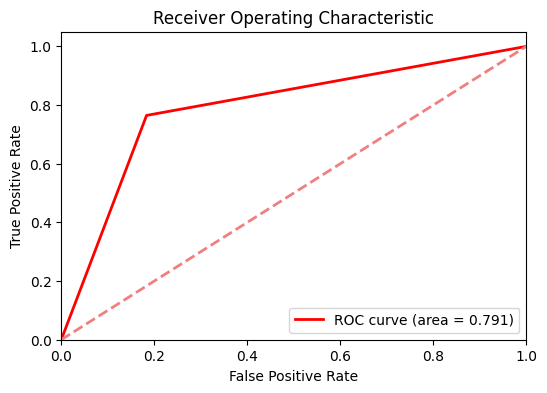

In [95]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(log_reg_grid, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [96]:
ml.k_cross_validate(log_reg,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96153846 0.95192308 0.94230769 0.95673077 0.95192308 0.9468599
 0.95652174 0.95652174 0.93236715 0.94202899]

Mean accuracy score:  0.9498722593831289

Standard deviation:  0.00845118375628942


In [97]:
ml.k_cross_validate(log_reg_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95673077 0.95192308 0.94711538 0.95673077 0.95192308 0.9468599
 0.95652174 0.95169082 0.94202899 0.9468599 ]

Mean accuracy score:  0.9508384429580083

Standard deviation:  0.0047743433260811225


In [98]:
ml.k_cross_validate(log_reg_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.79807692 0.8125     0.76923077 0.81730769 0.76923077 0.75845411
 0.75362319 0.76811594 0.77777778 0.80676329]

Mean accuracy score:  0.7831080453363063

Standard deviation:  0.022209562162860786


In [99]:
ml.k_cross_validate(log_reg_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95192308 0.95192308 0.94711538 0.95673077 0.95192308 0.95169082
 0.95169082 0.95169082 0.93719807 0.9468599 ]

Mean accuracy score:  0.9498745819397995

Standard deviation:  0.00496878201049623


### Stratified K-fold

In [104]:
ml.stratified_k_cross_validate(log_reg,X,y,n_splits=10)


Average Accuracy: 0.9474800260126347

Average Precision: 0.3

Average Recall: 0.09000000000000001

Average F1-Score: 0.13571428571428573


In [105]:
ml.stratified_k_cross_validate(log_reg_grid,X,y,n_splits=10)


Average Accuracy: 0.9474823485693051

Average Precision: 0.34500000000000003

Average Recall: 0.10000000000000002

Average F1-Score: 0.15142857142857144


In [106]:
ml.stratified_k_cross_validate(log_reg_rand,X,y,n_splits=10)


Average Accuracy: 0.7730444072835377

Average Precision: 0.13753896482591996

Average Recall: 0.7

Average F1-Score: 0.22958575906223827


In [107]:
ml.stratified_k_cross_validate(log_reg_opt,X,y,n_splits=10)


Average Accuracy: 0.9479584726867337

Average Precision: 0.3466666666666666

Average Recall: 0.11000000000000001

Average F1-Score: 0.16267399267399268


### Save Model

In [110]:
final_log_reg_estimator = log_reg_grid

In [112]:
# Saving the model

ml.save_model(final_log_reg_estimator, "../Models/Anemia/Logistic_Regression.pkl")

Saved Model


## Prediction

In [113]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [ 0.         -1.19373366 -1.41607306 -0.84214067  1.09679794 -0.37877952
  1.08348599 -1.40620797 -0.70387425  1.2373533  -1.49884753 -0.54217661
 -0.47640062  0.98744705  1.26474756  0.71534537  0.45036931 -1.57748608
 -0.41306638 -0.28957911 -1.6387515  -0.66089648 -1.6498771  -1.12560309
 -0.23955155  0.06304887 -0.76058279 -0.73703685 -0.76286084  0.11415794
  1.44362294 -0.34910405 -0.74243699 -0.3030719  -0.43830078  0.51206312
 -0.30692669  1.18701367  0.56365164 -1.33652482  0.99058484  0.45479813]

Expected Class:  0

 Modified Instance:
 [ 0.         -1.37747237 -1.46673384 -0.96917277  1.18008342 -0.37644803
  1.31024043 -1.33184911 -0.52532824  1.29392972 -1.76907272 -0.66656774
 -0.68976018  0.8874567   1.15481833  0.7915146   0.42986705 -1.57620899
 -0.18075678 -0.26851895 -1.66325209 -0.58321349 -1.81551416 -0.84978411
 -0.31045237 -0.0772688  -0.78794358 -0.4738524  -0.51607912  0.12401825
  1.70407365 -0.20957822 -0.43301907 -0.69144328 -0.35856652  0.564674

In [117]:
ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[5], y_test.iloc[5], 0.3)

Instance:
 [ 1.00000000e+00  6.39452518e-01  2.38279631e-01  1.05748732e+00
  1.10474526e+00 -6.88730703e-01 -2.43954276e-01 -1.02998626e+00
 -1.71153432e+00  3.01783971e-01 -1.35912232e+00  9.48528430e-01
 -4.76400617e-01  3.65066875e+00 -8.43221478e-01 -4.96345202e-01
  4.41921523e+00 -1.00705743e-01  1.32787776e+00 -1.26094249e-03
 -1.31281740e+00 -1.35186061e+00 -1.39817266e+00  1.43084176e+00
 -1.82390057e-01 -3.07335017e-02  2.52949520e+00 -4.07239777e-01
 -1.40055279e+00 -1.36376201e+00  4.17787283e+00 -7.38319722e-01
 -2.10101490e-01  1.09766063e+00 -4.38300778e-01 -6.27194245e-02
 -1.36544116e+00 -9.72884234e-01 -3.37390973e-01 -7.72346509e-01
 -3.98343397e-02 -5.08780500e-01]

Expected Class:  1

 Modified Instance:
 [ 1.          0.55408865  0.34620826  1.01207361  1.1906351  -0.92185308
 -0.44637939 -1.07601186 -1.58256092  0.28299748 -1.37401262  1.08293647
 -0.50746368  3.57692315 -0.9747483  -0.77704933  4.46311625  0.02865686
  1.2498563  -0.0164606  -1.45236959 -1.2451

In [119]:
ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[28], y_test.iloc[28], 0.3)

Instance:
 [ 0.          1.73936422  1.62331909  3.99327603  0.03582999 -0.7365075
 -1.77683172 -0.32268944 -3.78612858 -0.41788474 -3.12897504  0.7621903
  1.80044686  0.31237458 -0.79637772 -1.27917277  2.1910912  -0.69141788
  1.66639467  0.55949885 -0.09056452 -0.77934748 -2.78254707 -0.4287657
 -0.11676019 -1.10923083  6.4775888  -0.5391586  -0.69964138  0.63964059
  1.22480684 -0.24953725 -0.56499182 -0.39411951  0.13638577 -0.69450454
  0.39874963  0.25871712 -0.69869074  0.07392095 -0.64520561  0.08435106]

Expected Class:  1

 Modified Instance:
 [ 0.          1.77491832  1.37342736  3.73318546  0.14670913 -0.86627585
 -1.59906576 -0.17959278 -3.69627437 -0.45363888 -3.20065153  0.85171813
  2.11845074  0.3212103  -0.95850678 -1.29925443  2.32411298 -0.71917586
  1.50949551  0.71569697 -0.2792808  -0.96276639 -2.64988421 -0.3934177
 -0.21949387 -1.22761858  6.55039731 -0.80730994 -0.6030045   0.83303068
  1.08869677 -0.16846729 -0.53457488 -0.29256803  0.09912212 -1.05720253
 